# Edition, visualisation, traversal
## Weighted automata
<br>


In [1]:
# We disable autosave for technical reasons.
# Replace 0 by 120 in next line to restore default.
%autosave 0

Autosave disabled


In [2]:
import awalipy # If import fails, check that 
               # Python version used as Jupyter
               # kernel matches the one
               # Awalipy was compiled with.

[Warning] The python module awalipy relies on compilation executed "on-the-fly" depending on the context (type of weights, of labels, etc.). As a result, the very first call to a given function in a given context may take up to 10 seconds. 


## Creating an weighted automaton or transducer

The constructor of both `Transducer` and `Automaton` take a second optional argument `weightset` of type `str`. Currently the weightsets implemented in awali are the following:

- `"B"` : the set {true, false}, endowed with *and* and *or*
- `"N"` : the set of natural integers endowed with $+$ and $\times$ 
- `"Z"` : the set of relative integers endowed with $+$ and $\times$ 
- `"Q"` : the set of rational numbers endowed with $+$ and $\times$
- `"R"` : the set of real numbers (double) endowed with $+$ and $\times$
- `"C"` : the set of complex numbers (pairs of double) endowed with $+$ and $\times$
- `"N-oo"`: the set of natural integers completed with an infinite element, endowed with $+$ and $\times$
- `"Z-min-plus"`, set of relative integers endowed with $\min$ and $+$
- `"Z-max-plus"`, set of relative integers endowed with $\max$ and $+$
- `"R-max-prod"`, set of real numbers (double) endowed with $\max$ and $\times$
- `"Fuzzy"`, the set of integers endowed with $\min$ and $\max$
- `"Z/kZ"` (eg. `"Z/3Z"` `"Z/99Z"`), cyclic semiring of cardinal k, endowed with $+$ and $\times$<br>
- `"Nk"` (e.g `"N3"`, `"N20"`), the set $\{0,...,k\}$, endowed with $+$ (with $k+1=k$) and $\times$.

---
Creating an automaton over alphabet {0,1} and weightset Z.

In [3]:
A = awalipy.Automaton("01", "Z")

---
Adding states is the same as for unweighted automata.

In [4]:
stt_0 = A.add_state()
stt_1 = A.add_state()

---
Transitions of weighted automata bear weights.

- The function `set_transition` takes an optional fourth argument of type `str` representing a weight.
- The function `set_initial` and `set_final` take an optional second argument of type `str` representing a weight.

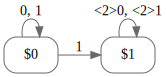

In [5]:
tr_0 = A.set_transition(stt_0,stt_0,"0","1")
tr_1 = A.set_transition(stt_0,stt_0,"1")        # Default "weight" parameter is the neutral element for multiplication.
tr_2 = A.set_transition(stt_0,stt_1,"1")        # In "Z" it is 1 and is not displayed.
tr_3 = A.set_transition(stt_1,stt_1,"0","2")
tr_4 = A.set_transition(stt_1,stt_1,"1","2")
A.display()

As may be seen above, weights are displayed between `<`...`>` and if a weight is the weightset multiplicative neutral element, then it is usually omitted.


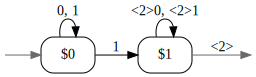

In [6]:
A.set_initial(stt_0,"1")
A.set_final(stt_1,"2")
A.display()

---
The methods starting with `set_` or `unset_` ignore an eventual previous weight.  Awali also provides all the same commands starting with `add_` which 
1) **add** given weight to a transition, possibly creating it; and
2) returns the new weight of the transition and not its id.

11
100
1001


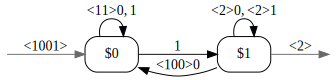

In [7]:
B = A.copy()
print (B.add_transition(stt_0,stt_0,"0","10"))
print (B.add_transition(stt_1,stt_0,"0","100"))
print (B.add_initial(stt_0,"1000"))
B.display()

---
For bigger automata, it may be useful to look at its string representation...

In [8]:
B

Automaton (lal_char_z):	Weight Set: Z	Alphabet: 01
States:{	0(i:1001)	1(f:2)	}
Transitions:{	0--<11>0-->0	0--1-->0	0--1-->1	1--<2>0-->1	1--<2>1-->1	1--<100>0-->0		}

NB: the mention "(i:1001)" following a state means that the state is *initial* with weight 1001.  Similarly, "(f:2)" means *final* with weight 2.

## Epsilon transitions
As for unweighted automata, epsilon transitions are not allowed by default.

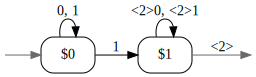

In [9]:
C = A.allow_eps_transition() # Copies the automaton
C.display()

---
Adding an epsilon-transition

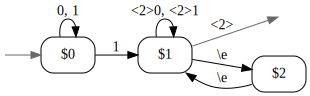

In [10]:
stt_2 = C.add_state()
tr_6 = C.set_eps_transition(stt_2,stt_1)
tr_7 = C.set_transition(stt_1,stt_2,"\\e")
C.display()

## Deleting edges and states

Same as for boolean automata

## Loading & saving automata

Same as for boolean automata

## Access and traversal
Same as for unweighted automata, with a few extras

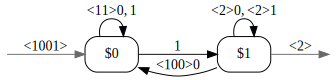

In [11]:
B.display()

---
Functions `src_of`, `dst_of` and `label_of` work just as for boolean automata. 

---
Getting the weight of a transition.

In [12]:
B.weight_of(tr_0)  # tr_0 is the transition s0 --<11>0--> s1

'11'

---
Getting the initial/final weight of a state.

In [13]:
B.get_initial_weight(stt_0), B.get_final_weight(stt_0)

('1001', '0')

---
Note also that the third parameter of `unpack_transition(tr_id)` is the weight.

In [14]:
tr_content = B.unpack_transition(tr_6)
print (tr_content)
print ("source: "+str(tr_content[0]))
print ("label: "+str(tr_content[1]))
print ("weight: "+str(tr_content[2]))
print ("destination: "+str(tr_content[3]))

(1, '0', '100', 0)
source: 1
label: 0
weight: 100
destination: 0
